# Импорты библиотек

In [3]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
import scipy.stats as stats
import warnings

warnings.filterwarnings("ignore")


%load_ext jupyter_black

# Чтение данных

In [4]:
df_path = "app_survey.csv"

df = pd.read_csv(df_path)

df.head()

,user_id,survey_creation_dt,survey_response_dt,csat_level,language,age,gender,tenure_years,user_income
0,user_00000,2025-04-28 16:01:51,2025-05-07 03:24:28,1,RU,35-44,M,21.105392,10000-25000
1,user_00001,2025-04-25 03:02:23,2025-04-29 13:12:29,5,RU,35-44,M,21.129793,68000-100000
2,user_00002,2025-04-30 11:02:14,2025-04-20 21:09:01,5,RU,45-54,M,21.098074,NaN
3,user_00003,2025-04-25 09:32:18,2025-04-26 19:51:12,5,RU,45-54,M,21.115544,25000-44000
4,user_00004,2025-04-30 08:32:06,2025-05-01 18:33:35,5,RU,45-54,M,21.127961,44000-68000


# Чистка и подготовка данных

In [5]:
df["survey_creation_dt"] = pd.to_datetime(df["survey_creation_dt"])
df["survey_response_dt"] = pd.to_datetime(df["survey_response_dt"])
df["user_id"] = df["user_id"].str[-5:].astype(int)

# Гипотезы

## **1. Гипотеза:** Мужчины ставят оценку в среднем выше, чем женщины / Мужчинам больше нравится приложение

### **Стратегия проверки:**

1. **Формулировка:**
   - H0: Распределения оценок мужчин и женщин одинаковы.
   - H1: Распределения оценок мужчин и женщин различаются.

2. **Выбор теста:**  
   - Если данные нормальны и дисперсии равны → **T-тест Стьюдента для независимых выборок**.  
   - Если условия не выполняются → **U-тест Манна-Уитни**.

3. **Проверка условий:**
   - Тест Шапиро-Уилка на нормальность для каждой группы.
   - Тест Левена на равенство дисперсий.

4. **Интерпретация:**  
   Если p-value < 0.05 → отвергаем H0 в пользу H1

---

## **2. Гипотеза:** Пользователи 18–24 лет оценивают пенсионное приложение ниже, чем пользователи 55–65 лет

### **Стратегия проверки:**

1. **Формулировка:**
   - H0: Средняя оценка (18–24) ≥ средней оценки (55–65).
   - H1: Средняя оценка (18–24) < средней оценки (55–65).

2. **Выбор теста:**  
   - Если данные нормальны и дисперсии равны → **T-тест Стьюдента для независимых выборок**.  
   - Если условия не выполняются → **U-тест Манна-Уитни**.

3. **Проверка условий:**
   - Тест Шапиро-Уилка на нормальность для каждой группы.
   - Тест Левена на равенство дисперсий.

4. **Интерпретация:**  
   Если p-value < 0.05 → отвергаем H0 в пользу H1

---

## **3. Гипотеза:** Пользователи с высоким доходом (>100K руб.) оценивают приложение строже, чем пользователи с низким доходом (<25K руб.)

### **Стратегия проверки:**

1. **Формулировка:**
   - H0: Средняя оценка высокой доходной группы ≥ средней оценки низкой доходной группы.
   - H1: Средняя оценка высокой доходной группы < средней оценки низкой доходной группы.

2. **Выбор теста:**  
   - Если данные нормальны и дисперсии равны → **T-тест Стьюдента для независимых выборок**.  
   - Если условия не выполняются → **U-тест Манна-Уитни**.

3. **Проверка условий:**
   - Тест Шапиро-Уилка на нормальность для каждой группы.
   - Тест Левена на равенство дисперсий.

4. **Интерпретация:**  
   Если p-value < 0.05 → отвергаем H0 в пользу H1

# Проверка гипотез

## Гипотеза 1

### Проверка

In [6]:
# Формирование отдельного DataFrame только с необходимыми полями
df_clean = df[["gender", "csat_level"]]
men_scores = df_clean[df_clean["gender"] == "M"]["csat_level"]
women_scores = df_clean[df_clean["gender"] == "F"]["csat_level"]

# Описательная статистика
print("\n=== Описательная статистика ===")
print("Мужчины:")
print(f"  Количество: {len(men_scores)}")
print(f"  Среднее: {men_scores.mean():.2f}")
print(f"  Медиана: {men_scores.median():.2f}")
print(f"  Стандартное отклонение: {men_scores.std():.2f}")

print("\nЖенщины:")
print(f"  Количество: {len(women_scores)}")
print(f"  Среднее: {women_scores.mean():.2f}")
print(f"  Медиана: {women_scores.median():.2f}")
print(f"  Стандартное отклонение: {women_scores.std():.2f}")

print(
    f"\nРазница средних (мужчины - женщины): {men_scores.mean() - women_scores.mean():.2f}"
)

# Проверка нормальности распределения (Шапиро-Уилк)
print("=== Проверка нормальности распределения ===")
stat_men, p_men = stats.shapiro(men_scores)
stat_women, p_women = stats.shapiro(women_scores)

print(f"Мужчины: stat={stat_men:.3f}, p={p_men:.3f}")
print(f"Женщины: stat={stat_women:.3f}, p={p_women:.3f}")

if p_men > 0.05 and p_women > 0.05:
    print("Обе группы распределены нормально (p > 0.05)")
    normal_dist = True
else:
    print("Хотя бы одна группа не распределена нормально")
    normal_dist = False

# Проверка равенства дисперсий (Левен)
print("\n=== Проверка равенства дисперсий ===")
stat_levene, p_levene = stats.levene(men_scores, women_scores)
print(f"Тест Левена: stat={stat_levene:.3f}, p={p_levene:.3f}")

if p_levene > 0.05:
    print("Дисперсии равны (p > 0.05)")
    equal_var = True
else:
    print("Дисперсии не равны")
    equal_var = False

# Проверяем, можно ли использовать параметрический тест
use_parametric = normal_dist and equal_var

if use_parametric:
    print("\n=== Используем T-тест Стьюдента (параметрический) ===")
    # Односторонний тест: men > women
    t_stat, p_value = stats.ttest_ind(
        men_scores, women_scores, equal_var=True, alternative="greater"
    )
    test_name = "T-тест Стьюдента"
else:
    print("\n=== Используем U-тест Манна-Уитни (непараметрический) ===")

    # Односторонний тест: men > women
    u_stat, p_value = stats.mannwhitneyu(
        men_scores, women_scores, alternative="greater"
    )
    test_name = "U-тест Манна-Уитни"

print(f"{test_name}: p-value = {p_value:.4f}")

print("\n=== Интерпретация результатов ===")
print(f"H0: Средняя оценка мужчин ≤ средней оценки женщин")
print(f"H1: Средняя оценка мужчин > средней оценки женщин")

alpha = 0.05
if p_value < alpha:
    print(f"\n✅ p-value ({p_value:.4f}) < α ({alpha})")
    print(
        "Отвергаем нулевую гипотезу. Вывод: Средняя оценка мужчин > средней оценки женщин"
    )
else:
    print(f"\n❌ p-value ({p_value:.4f}) ≥ α ({alpha})")
    print(
        "Нет оснований отвергать нулевую гипотезу. Вывод: Средняя оценка мужчин ≤ средней оценки женщин"
    )


=== Описательная статистика ===
Мужчины:
  Количество: 32413
  Среднее: 4.12
  Медиана: 5.00
  Стандартное отклонение: 1.49

Женщины:
  Количество: 9974
  Среднее: 4.05
  Медиана: 5.00
  Стандартное отклонение: 1.55

Разница средних (мужчины - женщины): 0.07
=== Проверка нормальности распределения ===
Мужчины: stat=0.605, p=0.000
Женщины: stat=0.618, p=0.000
Хотя бы одна группа не распределена нормально

=== Проверка равенства дисперсий ===
Тест Левена: stat=15.572, p=0.000
Дисперсии не равны

=== Используем U-тест Манна-Уитни (непараметрический) ===
U-тест Манна-Уитни: p-value = 0.0008

=== Интерпретация результатов ===
H0: распределения оценок мужчин и женщин одинаковы
H1: распределения оценок мужчин и женщин различаются

✅ p-value (0.0008) < α (0.05)
Отвергаем нулевую гипотезу. Вывод: распределения оценок мужчин и женщин различаются


### Визуализация

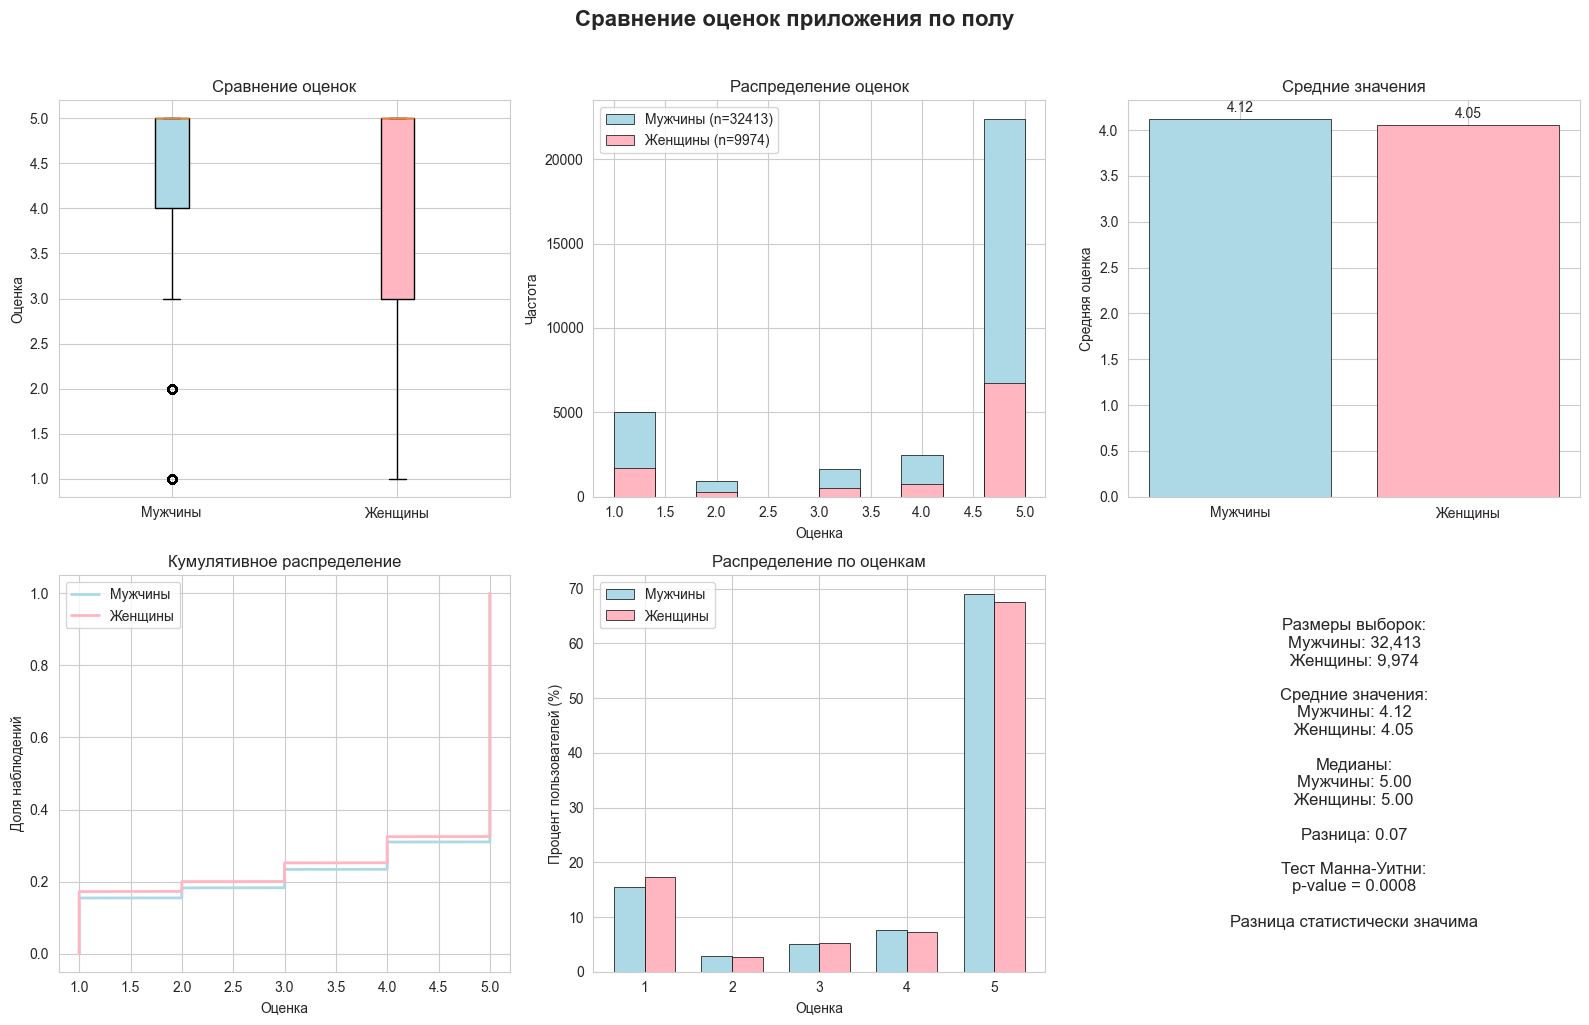

In [7]:
# Создаем фигуру с 6 графиками
fig, axes = plt.subplots(2, 3, figsize=(16, 10))
axes = axes.flatten()

# 1. Боксплот
box_data = [men_scores, women_scores]
box = axes[0].boxplot(box_data, labels=["Мужчины", "Женщины"], patch_artist=True)
colors = ["lightblue", "lightpink"]
for patch, color in zip(box["boxes"], colors):
    patch.set_facecolor(color)

axes[0].set_ylabel("Оценка")
axes[0].set_title("Сравнение оценок")

# 2. Гистограммы
axes[1].hist(
    men_scores,
    label=f"Мужчины (n={len(men_scores)})",
    color="lightblue",
    edgecolor="black",
    linewidth=0.5,
)
axes[1].hist(
    women_scores,
    label=f"Женщины (n={len(women_scores)})",
    color="lightpink",
    edgecolor="black",
    linewidth=0.5,
)
axes[1].set_xlabel("Оценка")
axes[1].set_ylabel("Частота")
axes[1].set_title("Распределение оценок")
axes[1].legend()

# 3. Столбчатый график средних
categories = ["Мужчины", "Женщины"]
means = [men_scores.mean(), women_scores.mean()]

bars = axes[2].bar(
    categories,
    means,
    color=["lightblue", "lightpink"],
    edgecolor="black",
    linewidth=0.5,
)

for bar, mean in zip(bars, means):
    axes[2].text(
        bar.get_x() + bar.get_width() / 2,
        bar.get_height() + 0.05,
        f"{mean:.2f}",
        ha="center",
        va="bottom",
    )

axes[2].set_ylabel("Средняя оценка")
axes[2].set_title("Средние значения")


# 4. Кумулятивное распределение
def ecdf(data):
    x = np.sort(data)
    y = np.arange(1, len(x) + 1) / len(x)
    return x, y


x_men, y_men = ecdf(men_scores)
x_women, y_women = ecdf(women_scores)

axes[3].plot(x_men, y_men, label="Мужчины", linewidth=2, color="lightblue")
axes[3].plot(x_women, y_women, label="Женщины", linewidth=2, color="lightpink")

axes[3].set_xlabel("Оценка")
axes[3].set_ylabel("Доля наблюдений")
axes[3].set_title("Кумулятивное распределение")
axes[3].legend()

# 5. Процентное распределение
rating_range = range(1, 6)
men_percents = [(men_scores == i).mean() * 100 for i in rating_range]
women_percents = [(women_scores == i).mean() * 100 for i in rating_range]

x = np.arange(len(rating_range))
width = 0.35

axes[4].bar(
    x - width / 2,
    men_percents,
    width,
    label="Мужчины",
    color="lightblue",
    edgecolor="black",
    linewidth=0.5,
)
axes[4].bar(
    x + width / 2,
    women_percents,
    width,
    label="Женщины",
    color="lightpink",
    edgecolor="black",
    linewidth=0.5,
)

axes[4].set_xlabel("Оценка")
axes[4].set_ylabel("Процент пользователей (%)")
axes[4].set_title("Распределение по оценкам")
axes[4].set_xticks(x)
axes[4].set_xticklabels(rating_range)
axes[4].legend()

# 6. Статистика
axes[5].axis("off")

stats_text = f"""
Размеры выборок:
Мужчины: {len(men_scores):,}
Женщины: {len(women_scores):,}

Средние значения:
Мужчины: {men_scores.mean():.2f}
Женщины: {women_scores.mean():.2f}

Медианы:
Мужчины: {men_scores.median():.2f}
Женщины: {women_scores.median():.2f}

Разница: {men_scores.mean() - women_scores.mean():.2f}

Тест Манна-Уитни:
p-value = {p_value:.4f}

Разница статистически значима
"""

axes[5].text(
    0.5,
    0.5,
    stats_text,
    transform=axes[5].transAxes,
    fontsize=12,
    verticalalignment="center",
    horizontalalignment="center",
)

# Общий заголовок
fig.suptitle(
    "Сравнение оценок приложения по полу", fontsize=16, fontweight="bold", y=1.02
)

plt.tight_layout()
# plt.savefig("gender_ratings_comparison.png", dpi=300, bbox_inches="tight") #если мне вдруг надо будет сохранить
plt.show()

## Гипотеза 2
Пользователи в начале карьеры (18-24 года) оценивают пенсионное приложение ниже, чем пользователи предпенсионного возраста (55-65 лет)

### Проверка

In [8]:
# Код проверки гипотезы 2
df_hypothesis_2 = df[["age", "csat_level"]]
young_scores = df_hypothesis_2[df_hypothesis_2["age"] == "18-24"]["csat_level"]
pre_retirement_scores = df_hypothesis_2[df_hypothesis_2["age"] == "55-65"]["csat_level"]

# Описательная статистика
print("\n=== Описательная статистика ===")
print("Молодые:")
print(f"  Количество: {len(young_scores)}")
print(f"  Среднее: {young_scores.mean():.2f}")
print(f"  Медиана: {young_scores.median():.2f}")
print(f"  Стандартное отклонение: {young_scores.std():.2f}")

print("\nПредпенсионеры:")
print(f"  Количество: {len(pre_retirement_scores)}")
print(f"  Среднее: {pre_retirement_scores.mean():.2f}")
print(f"  Медиана: {pre_retirement_scores.median():.2f}")
print(f"  Стандартное отклонение: {pre_retirement_scores.std():.2f}")

print(
    f"\nРазница средних (Предпенсионеры - Молодые): {pre_retirement_scores.mean() - young_scores.mean():.2f}"
)

# Проверка нормальности распределения (Шапиро-Уилк)
print("=== Проверка нормальности распределения ===")
stat_young, p_young = stats.shapiro(young_scores)
stat_pre_retirement, p_pre_retirement = stats.shapiro(pre_retirement_scores)

print(f"Молодые: stat={stat_young:.3f}, p={p_young:.3f}")
print(f"Предпенсионеры: stat={stat_pre_retirement:.3f}, p={p_pre_retirement:.3f}")

if p_young > 0.05 and p_pre_retirement > 0.05:
    print("Обе группы распределены нормально (p > 0.05)")
    normal_dist = True
else:
    print("Хотя бы одна группа не распределена нормально")
    normal_dist = False

# Проверка равенства дисперсий (Левен)
print("\n=== Проверка равенства дисперсий ===")
stat_levene, p_levene = stats.levene(young_scores, pre_retirement_scores)
print(f"Тест Левена: stat={stat_levene:.3f}, p={p_levene:.3f}")

if p_levene > 0.05:
    print("Дисперсии равны (p > 0.05)")
    equal_var = True
else:
    print("Дисперсии не равны")
    equal_var = False

# Проверяем, можно ли использовать параметрический тест
use_parametric = normal_dist and equal_var

if use_parametric:
    print("\n=== Используем T-тест Стьюдента (параметрический) ===")
    # Односторонний тест: men > women
    t_stat, p_value = stats.ttest_ind(
        young_scores, pre_retirement_scores, equal_var=True, alternative="less"
    )
    test_name = "T-тест Стьюдента"
else:
    print("\n=== Используем U-тест Манна-Уитни (непараметрический) ===")

    # Односторонний тест: men > women
    u_stat, p_value = stats.mannwhitneyu(
        young_scores, pre_retirement_scores, alternative="less"
    )
    test_name = "U-тест Манна-Уитни"

print(f"{test_name}: p-value = {p_value:.4f}")

print("\n=== Интерпретация результатов ===")
print(f"H0: Средняя оценка Молодые >= средней оценки предпенсионеров")
print(f"H1: Средняя оценка Молодые < средней оценки предпенсионеров")

alpha = 0.05
if p_value < alpha:
    print(f"\n✅ p-value ({p_value:.4f}) < α ({alpha})")
    print(
        "Отвергаем нулевую гипотезу. Вывод: Средняя оценка Молодые < средней оценки Предпенсионеры"
    )
else:
    print(f"\n❌ p-value ({p_value:.4f}) ≥ α ({alpha})")
    print(
        "Нет оснований отвергать нулевую гипотезу. Вывод: Средняя оценка Молодые >= средней оценки Предпенсионеры"
    )


=== Описательная статистика ===
Молодые:
  Количество: 3640
  Среднее: 3.91
  Медиана: 5.00
  Стандартное отклонение: 1.61

Предпенсионеры:
  Количество: 6312
  Среднее: 4.17
  Медиана: 5.00
  Стандартное отклонение: 1.45

Разница средних (Предпенсионеры - Молодые): 0.26
=== Проверка нормальности распределения ===
Молодые: stat=0.652, p=0.000
Предпенсионеры: stat=0.595, p=0.000
Хотя бы одна группа не распределена нормально

=== Проверка равенства дисперсий ===
Тест Левена: stat=67.521, p=0.000
Дисперсии не равны

=== Используем U-тест Манна-Уитни (непараметрический) ===
U-тест Манна-Уитни: p-value = 0.0000

=== Интерпретация результатов ===
H0: Распределения оценок возрастных групп 18–24 и 55–65 одинаковы
H1: Распределения оценок возрастных групп 18–24 и 55–65 различаются

✅ p-value (0.0000) < α (0.05)
Отвергаем нулевую гипотезу. Вывод: Распределения оценок возрастных групп 18–24 и 55–65 различаются


### Визуализация

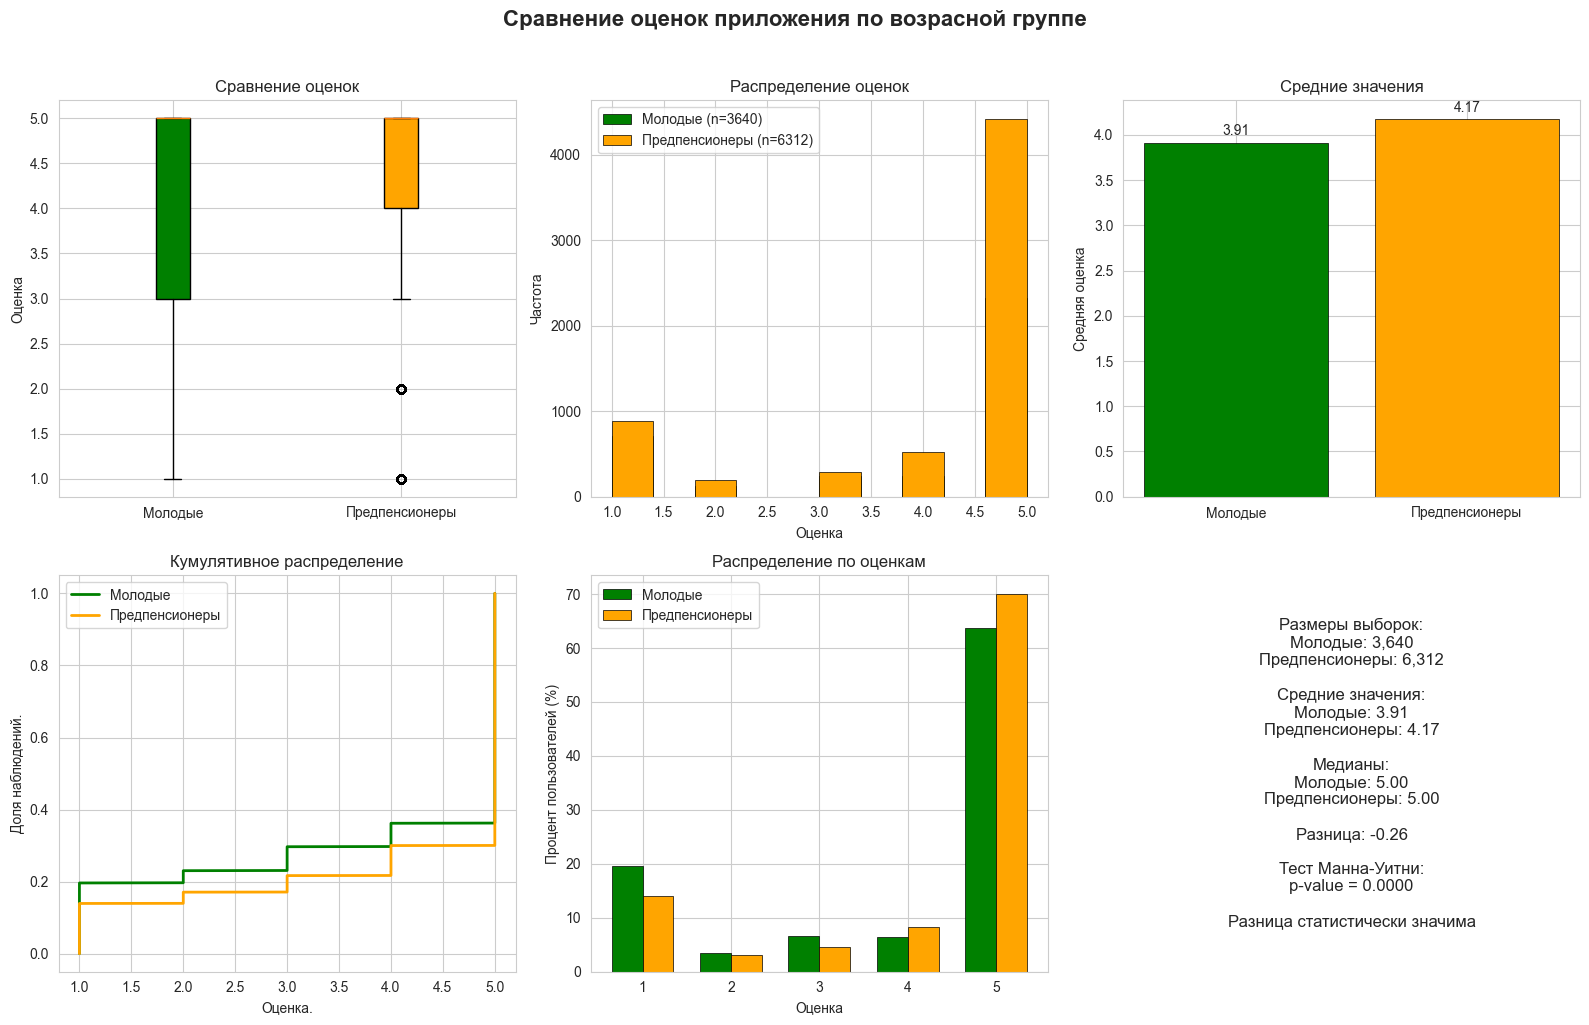

In [9]:
fig, axes = plt.subplots(2, 3, figsize=(16, 10))
axes = axes.flatten()

# 1. Боксплот
box_data = [young_scores, pre_retirement_scores]
box = axes[0].boxplot(box_data, labels=["Молодые", "Предпенсионеры"], patch_artist=True)
colors = ["green", "orange"]
for patch, color in zip(box["boxes"], colors):
    patch.set_facecolor(color)

axes[0].set_ylabel("Оценка")
axes[0].set_title("Сравнение оценок")

# 2. Гистограммы
axes[1].hist(
    young_scores,
    label=f"Молодые (n={len(young_scores)})",
    color="green",
    edgecolor="black",
    linewidth=0.5,
)
axes[1].hist(
    pre_retirement_scores,
    label=f"Предпенсионеры (n={len(pre_retirement_scores)})",
    color="orange",
    edgecolor="black",
    linewidth=0.5,
)
axes[1].set_xlabel("Оценка")
axes[1].set_ylabel("Частота")
axes[1].set_title("Распределение оценок")
axes[1].legend()

# 3. Столбчатый график средних
categories = ["Молодые", "Предпенсионеры"]
means = [young_scores.mean(), pre_retirement_scores.mean()]

bars = axes[2].bar(
    categories,
    means,
    color=["green", "orange"],
    edgecolor="black",
    linewidth=0.5,
)

for bar, mean in zip(bars, means):
    axes[2].text(
        bar.get_x() + bar.get_width() / 2,
        bar.get_height() + 0.05,
        f"{mean:.2f}",
        ha="center",
        va="bottom",
    )

axes[2].set_ylabel("Средняя оценка")
axes[2].set_title("Средние значения")


# 4. Кумулятивное распределение
def ecdf(data):
    x = np.sort(data)
    y = np.arange(1, len(x) + 1) / len(x)
    return x, y


x_young, y_young = ecdf(young_scores)
x_pre_retirement, y_pre_retirement = ecdf(pre_retirement_scores)

axes[3].plot(x_young, y_young, label="Молодые", linewidth=2, color="green")
axes[3].plot(
    x_pre_retirement,
    y_pre_retirement,
    label="Предпенсионеры",
    linewidth=2,
    color="orange",
)

axes[3].set_xlabel("Оценка.")
axes[3].set_ylabel("Доля наблюдений.")
axes[3].set_title("Кумулятивное распределение")
axes[3].legend()

# 5. Процентное распределение
rating_range = range(1, 6)
young_percents = [(young_scores == i).mean() * 100 for i in rating_range]
pre_retirement_percents = [
    (pre_retirement_scores == i).mean() * 100 for i in rating_range
]

x = np.arange(len(rating_range))
width = 0.35

axes[4].bar(
    x - width / 2,
    young_percents,
    width,
    label="Молодые",
    color="green",
    edgecolor="black",
    linewidth=0.5,
)
axes[4].bar(
    x + width / 2,
    pre_retirement_percents,
    width,
    label="Предпенсионеры",
    color="orange",
    edgecolor="black",
    linewidth=0.5,
)

axes[4].set_xlabel("Оценка")
axes[4].set_ylabel("Процент пользователей (%)")
axes[4].set_title("Распределение по оценкам")
axes[4].set_xticks(x)
axes[4].set_xticklabels(rating_range)
axes[4].legend()

# 6. Статистика
axes[5].axis("off")

stats_text = f"""
Размеры выборок:
Молодые: {len(young_scores):,}
Предпенсионеры: {len(pre_retirement_scores):,}

Средние значения:
Молодые: {young_scores.mean():.2f}
Предпенсионеры: {pre_retirement_scores.mean():.2f}

Медианы:
Молодые: {young_scores.median():.2f}
Предпенсионеры: {pre_retirement_scores.median():.2f}

Разница: {young_scores.mean() - pre_retirement_scores.mean():.2f}

Тест Манна-Уитни:
p-value = {p_value:.4f}

Разница статистически значима
"""

axes[5].text(
    0.5,
    0.5,
    stats_text,
    transform=axes[5].transAxes,
    fontsize=12,
    verticalalignment="center",
    horizontalalignment="center",
)

# Общий заголовок
fig.suptitle(
    "Сравнение оценок приложения по возрасной группе",
    fontsize=16,
    fontweight="bold",
    y=1.02,
)

plt.tight_layout()
plt.show()

...

## Гипотеза N3
Пользователи с высоким доходом (>100K руб.) оценивают приложение строже, чем пользователи с низким доходом (<25K руб.)

### Проверка

In [10]:
# Код проверки гипотезы 3: Влияние дохода на оценку
df_hypothesis_3 = df[["user_income", "csat_level"]]

# Формируем группы: низкий доход (<25K) и высокий доход (>100K)
low_income_scores = df_hypothesis_3[
    df_hypothesis_3["user_income"].isin(["<10000", "10000-25000"])
]["csat_level"]
high_income_scores = df_hypothesis_3[df_hypothesis_3["user_income"] == ">100000"][
    "csat_level"
]

# Описательная статистика
print("\n=== Описательная статистика ===")
print("Низкий доход (<25K руб.):")
print(f"  Количество: {len(low_income_scores):,}")
print(f"  Среднее: {low_income_scores.mean():.2f}")
print(f"  Медиана: {low_income_scores.median():.2f}")
print(f"  Стандартное отклонение: {low_income_scores.std():.2f}")

print("\nВысокий доход (>100K руб.):")
print(f"  Количество: {len(high_income_scores):,}")
print(f"  Среднее: {high_income_scores.mean():.2f}")
print(f"  Медиана: {high_income_scores.median():.2f}")
print(f"  Стандартное отклонение: {high_income_scores.std():.2f}")

print(
    f"\nРазница средних (Низкий доход - Высокий доход): {low_income_scores.mean() - high_income_scores.mean():.2f}"
)

# Проверка нормальности распределения (Шапиро-Уилк)
print("\n=== Проверка нормальности распределения ===")
stat_low, p_low = stats.shapiro(low_income_scores)
stat_high, p_high = stats.shapiro(high_income_scores)

print(f"Низкий доход: stat={stat_low:.3f}, p={p_low:.3e}")
print(f"Высокий доход: stat={stat_high:.3f}, p={p_high:.3e}")

if p_low > 0.05 and p_high > 0.05:
    print("Обе группы распределены нормально (p > 0.05)")
    normal_dist = True
else:
    print("Хотя бы одна группа не распределена нормально")
    normal_dist = False

# Проверка равенства дисперсий (Левен)
print("\n=== Проверка равенства дисперсий ===")
stat_levene, p_levene = stats.levene(low_income_scores, high_income_scores)
print(f"Тест Левена: stat={stat_levene:.3f}, p={p_levene:.3e}")

if p_levene > 0.05:
    print("Дисперсии равны (p > 0.05)")
    equal_var = True
else:
    print("Дисперсии не равны")
    equal_var = False

# Проверяем, можно ли использовать параметрический тест
use_parametric = normal_dist and equal_var

if use_parametric:
    print("\n=== Используем T-тест Стьюдента (параметрический) ===")
    # Односторонний тест: low > high (низкий доход оценивает ВЫШЕ)
    # Но наша гипотеза: высокий доход оценивает СТРОЖЕ (ниже)
    # Значит: high < low → alternative='less' для группы high по сравнению с low
    t_stat, p_value = stats.ttest_ind(
        high_income_scores, low_income_scores, equal_var=True, alternative="less"
    )
    test_name = "T-тест Стьюдента"
else:
    print("\n=== Используем U-тест Манна-Уитни (непараметрический) ===")

    # Односторонний тест: high < low
    u_stat, p_value = stats.mannwhitneyu(
        high_income_scores, low_income_scores, alternative="less"
    )
    test_name = "U-тест Манна-Уитни"

print(f"{test_name}: p-value = {p_value:.4f}")

print("\n=== Интерпретация результатов ===")
print(
    f"H0: Средняя оценка высокой доходной группы ≥ средней оценки низкой доходной группы"
)
print(
    f"H1: Средняя оценка высокой доходной группы < средней оценки низкой доходной группы"
)
print(f"   (Высокодоходные оценивают СТРОЖЕ)")

alpha = 0.05
if p_value < alpha:
    print(f"\np-value ({p_value:.4f}) < α ({alpha})")
    print(
        "Отвергаем нулевую гипотезу. Вывод: Высокодоходные пользователи оценивают приложение СТРОЖЕ, чем низкодоходные"
    )
else:
    print(f"\n❌ p-value ({p_value:.4f}) ≥ α ({alpha})")
    print(
        "Нет оснований отвергать нулевую гипотезу. Вывод: Нет доказательств, что высокодоходные оценивают строже"
    )

# Дополнительно: размер эффекта (Cohen's d)
print("\n=== Размер эффекта ===")
from math import sqrt

# Cohen's d
n1, n2 = len(low_income_scores), len(high_income_scores)
s1, s2 = low_income_scores.std(), high_income_scores.std()
pooled_sd = sqrt(((n1 - 1) * s1**2 + (n2 - 1) * s2**2) / (n1 + n2 - 2))
cohen_d = (low_income_scores.mean() - high_income_scores.mean()) / pooled_sd

print(f"Коэна d = {cohen_d:.3f}")
if abs(cohen_d) < 0.2:
    print("  Очень маленький эффект")
elif abs(cohen_d) < 0.5:
    print("  Маленький эффект")
elif abs(cohen_d) < 0.8:
    print("  Средний эффект")
else:
    print("  Большой эффект")

# Краткий итог для отчета
print("\n" + "=" * 60)
print("ИТОГ ДЛЯ ОТЧЕТА:")
print("=" * 60)
print(
    f"Гипотеза: Высокодоходные (>100K руб.) оценивают строже, чем низкодоходные (<25K руб.)"
)
print(f"Тест: {test_name}")
print(f"p-value: {p_value:.4f}")
print(f"Разница средних: {low_income_scores.mean() - high_income_scores.mean():.2f}")
print(f"Размер эффекта (Коэна d): {cohen_d:.3f}")
print(f"Результат: {'ПОДТВЕРЖДЕНА' if p_value < alpha else 'НЕ ПОДТВЕРЖДЕНА'}")
print("=" * 60)


=== Описательная статистика ===
Низкий доход (<25K руб.):
  Количество: 19,653
  Среднее: 4.24
  Медиана: 5.00
  Стандартное отклонение: 1.40

Высокий доход (>100K руб.):
  Количество: 2,418
  Среднее: 3.92
  Медиана: 5.00
  Стандартное отклонение: 1.58

Разница средних (Низкий доход - Высокий доход): 0.32

=== Проверка нормальности распределения ===
Низкий доход: stat=0.576, p=2.102e-111
Высокий доход: stat=0.664, p=2.136e-56
Хотя бы одна группа не распределена нормально

=== Проверка равенства дисперсий ===
Тест Левена: stat=107.011, p=5.051e-25
Дисперсии не равны

=== Используем U-тест Манна-Уитни (непараметрический) ===
U-тест Манна-Уитни: p-value = 0.0000

=== Интерпретация результатов ===
H0: Распределения оценок групп с высоким и низким доходом одинаковы
H1: Распределения оценок групп с высоким и низким доходом различаются
   (Высокодоходные оценивают СТРОЖЕ)

p-value (0.0000) < α (0.05)
Отвергаем нулевую гипотезу. Вывод: Распределения оценок групп с высоким и низким доходом ра

### Визуализация

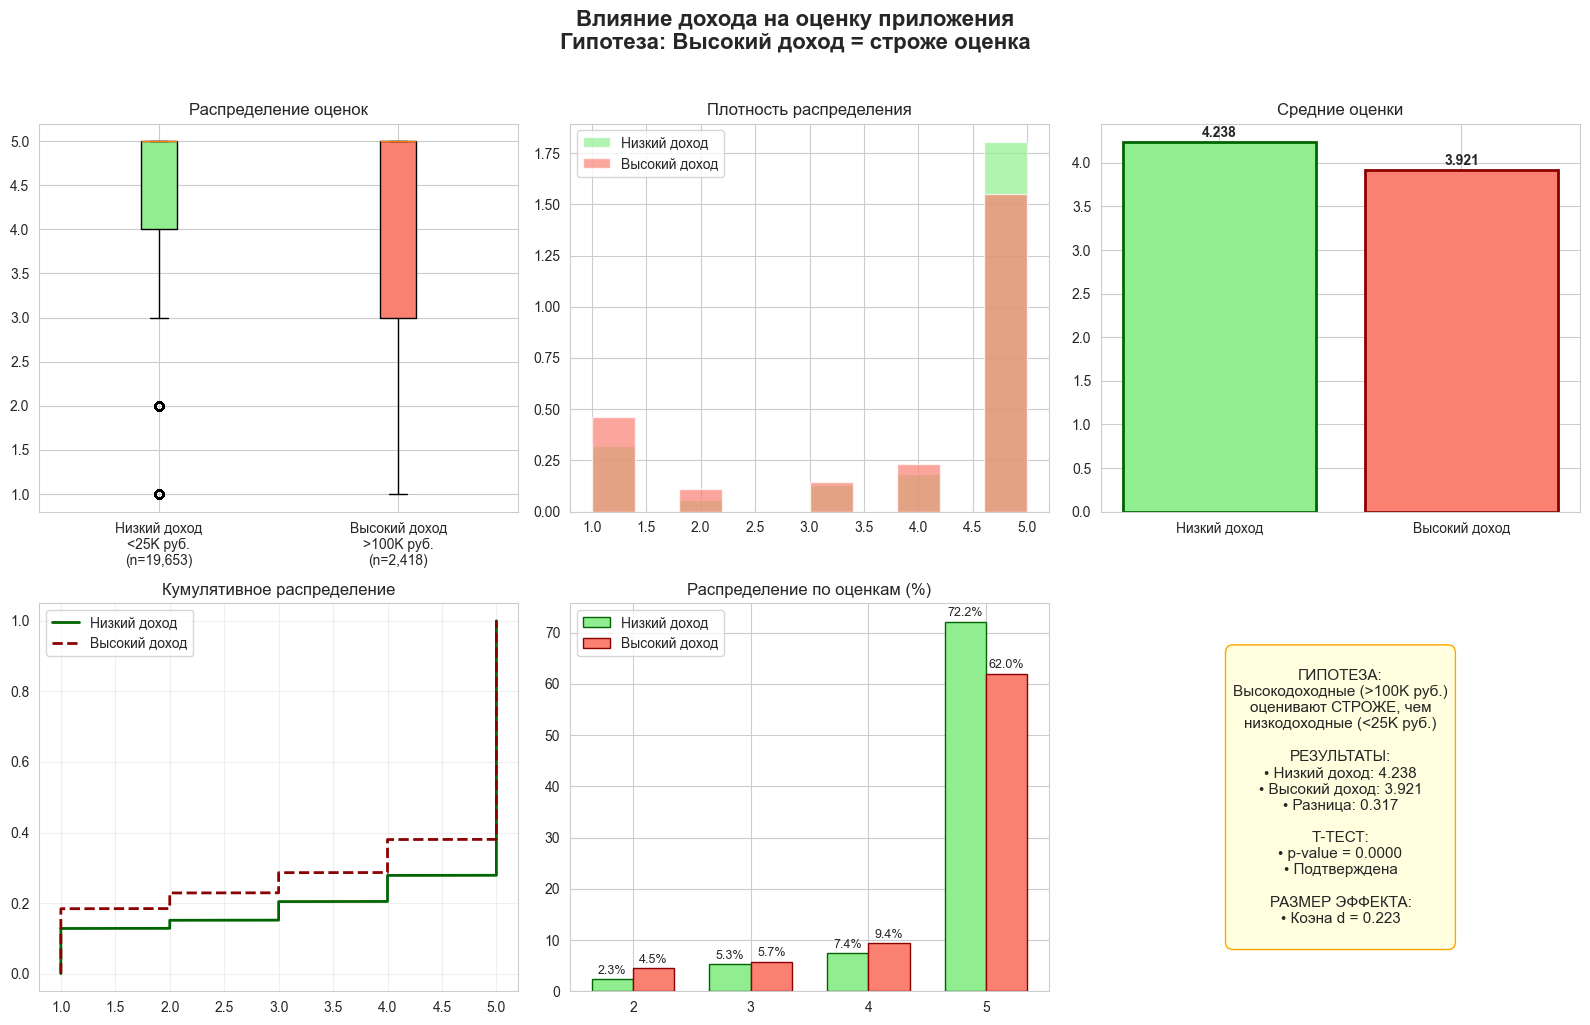

In [11]:
# Код визуализации гипотезы N3
def visualize_income_hypothesis_compact(df):
    """Визуализация гипотезы о доходе"""

    # Данные
    low_scores = df[df["user_income"].isin(["<10000", "10000-25000"])]["csat_level"]
    high_scores = df[df["user_income"] == ">100000"]["csat_level"]

    # Статистика
    t_stat, p_value = stats.ttest_ind(high_scores, low_scores, alternative="less")
    diff = low_scores.mean() - high_scores.mean()

    # График
    fig, axes = plt.subplots(2, 3, figsize=(16, 10))
    axes = axes.flatten()

    # 1. Боксплот
    bp = axes[0].boxplot(
        [low_scores, high_scores],
        labels=[
            f"Низкий доход\n<25K руб.\n(n={len(low_scores):,})",
            f"Высокий доход\n>100K руб.\n(n={len(high_scores):,})",
        ],
        patch_artist=True,
    )
    colors = ["lightgreen", "salmon"]
    for patch, color in zip(bp["boxes"], colors):
        patch.set_facecolor(color)
    axes[0].set_title("Распределение оценок")

    # 2. Гистограммы
    axes[1].hist(
        low_scores, alpha=0.7, label="Низкий доход", color="lightgreen", density=True
    )
    axes[1].hist(
        high_scores, alpha=0.7, label="Высокий доход", color="salmon", density=True
    )
    axes[1].set_title("Плотность распределения")
    axes[1].legend()

    # 3. Средние значения
    means = [low_scores.mean(), high_scores.mean()]
    bars = axes[2].bar(
        ["Низкий доход", "Высокий доход"],
        means,
        color=colors,
        edgecolor=["darkgreen", "darkred"],
        linewidth=2,
    )
    for bar, mean in zip(bars, means):
        axes[2].text(
            bar.get_x() + bar.get_width() / 2,
            bar.get_height() + 0.02,
            f"{mean:.3f}",
            ha="center",
            va="bottom",
            fontweight="bold",
        )
    axes[2].set_title("Средние оценки")

    # 4. Кумулятивное распределение
    def ecdf(data):
        x = np.sort(data)
        y = np.arange(1, len(x) + 1) / len(x)
        return x, y

    x_low, y_low = ecdf(low_scores)
    x_high, y_high = ecdf(high_scores)
    axes[3].plot(x_low, y_low, label="Низкий доход", linewidth=2, color="darkgreen")
    axes[3].plot(
        x_high,
        y_high,
        label="Высокий доход",
        linewidth=2,
        color="darkred",
        linestyle="--",
    )
    axes[3].set_title("Кумулятивное распределение")
    axes[3].legend()
    axes[3].grid(alpha=0.3)

    # 5. Процент по оценкам
    rating_range = range(2, 6)
    low_pct = [(low_scores == i).mean() * 100 for i in rating_range]
    high_pct = [(high_scores == i).mean() * 100 for i in rating_range]

    x = np.arange(len(rating_range))
    width = 0.35

    axes[4].bar(
        x - width / 2,
        low_pct,
        width,
        label="Низкий доход",
        color="lightgreen",
        edgecolor="darkgreen",
    )
    axes[4].bar(
        x + width / 2,
        high_pct,
        width,
        label="Высокий доход",
        color="salmon",
        edgecolor="darkred",
    )

    for i, (l, h) in enumerate(zip(low_pct, high_pct)):
        axes[4].text(
            i - width / 2, l + 0.5, f"{l:.1f}%", ha="center", va="bottom", fontsize=9
        )
        axes[4].text(
            i + width / 2, h + 0.5, f"{h:.1f}%", ha="center", va="bottom", fontsize=9
        )

    axes[4].set_xticks(x)
    axes[4].set_xticklabels([f"{i}" for i in rating_range])
    axes[4].set_title("Распределение по оценкам (%)")
    axes[4].legend()

    # 6. Статистика
    axes[5].axis("off")

    # Размер эффекта
    pooled_sd = np.sqrt(
        (
            (len(low_scores) - 1) * low_scores.std() ** 2
            + (len(high_scores) - 1) * high_scores.std() ** 2
        )
        / (len(low_scores) + len(high_scores) - 2)
    )
    cohen_d = diff / pooled_sd

    stats_text = f"""
ГИПОТЕЗА:
Высокодоходные (>100K руб.)
оценивают СТРОЖЕ, чем
низкодоходные (<25K руб.)

РЕЗУЛЬТАТЫ:
• Низкий доход: {low_scores.mean():.3f}
• Высокий доход: {high_scores.mean():.3f}
• Разница: {diff:.3f}

Т-ТЕСТ:
• p-value = {p_value:.4f}
• {'Подтверждена' if p_value < 0.05 else 'Не подтверждена'}

РАЗМЕР ЭФФЕКТА:
• Коэна d = {cohen_d:.3f}
"""

    axes[5].text(
        0.5,
        0.5,
        stats_text,
        transform=axes[5].transAxes,
        fontsize=11,
        verticalalignment="center",
        horizontalalignment="center",
        bbox=dict(
            boxstyle="round,pad=0.5", facecolor="lightyellow", edgecolor="orange"
        ),
    )

    # Общий заголовок
    fig.suptitle(
        "Влияние дохода на оценку приложения\nГипотеза: Высокий доход = строже оценка",
        fontsize=16,
        fontweight="bold",
        y=1.02,
    )

    plt.tight_layout()
    plt.show()


# Запуск
visualize_income_hypothesis_compact(df)

## Вывод

Гипотеза №1 "Мужчины ставят оценку в среднем выше, чем женщины / Мужчинам больше нравится приложение" подтвердилась. Принимаем H1: Распределения оценок мужчин и женщин отличаются.
  
Гипотеза №2 "Пользователи в начале карьеры (18-24 года) оценивают пенсионное приложение ниже, чем пользователи предпенсионного возраста (55-65 лет)" подтвердилась. Принимаем H1: Распределения оценок возрастных групп 18–24 и 55–65 различаются.

Гипотеза №3 "Пользователи с высоким доходом (>100K руб.) оценивают пенсионное приложение строже, чем пользователи с низким доходом (<25K руб.)" подтвердилась. Принимаем H₁: Распределения оценок групп с высоким и низким доходом различаются. Разница составляет 0.32 балла (4.24 vs 3.92) и является статистически значимой (p < 0.0001, U-тест Манна-Уитни).